# Imports

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [3]:
import os
from glob import glob

In [4]:
plt.style.use('cook')

In [5]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions
import results as rr

CPU times: user 28.5 ms, sys: 8.81 ms, total: 37.3 ms
Wall time: 46.5 ms


In [8]:
%%time
from drivers import filters, iso_models, drivers, sky

Loading Isochrone Models
CPU times: user 45.3 s, sys: 10.2 s, total: 55.5 s
Wall time: 57.5 s


GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.

In [9]:
%%time
for i in range(9, 10):
    print(i)
    rr.load_model(i, all_quads=False)

9
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
CPU times: user 36 s, sys: 762 ms, total: 36.7 s
Wall time: 38.5 s


In [10]:
rr.add_set_v2('M87v2', 1, "wide", f'M87v2_wide_m1', 'M87_I_gI_wide')
radii_kpc[f'M31_wide_m1'] = radii_kpc[f'M87v2_b1_m9']

In [11]:
m51_desc = {
    'a': 'Gap 1',
    'b': 'Arm 1',
    'c': 'Gap 2',
    'd': 'Arm 2',
    'e': 'Inner Arm'
}

In [12]:
colors = sns.color_palette('colorblind')
markers = ['o', 's', 'D', 'p', '*', 'X', '^']

# Figure 2 - PCMDs

Saving light figure as figures/pcmds_M87v2.pdf
Saving dark figure as figures_dark/pcmds_M87v2_dark.pdf


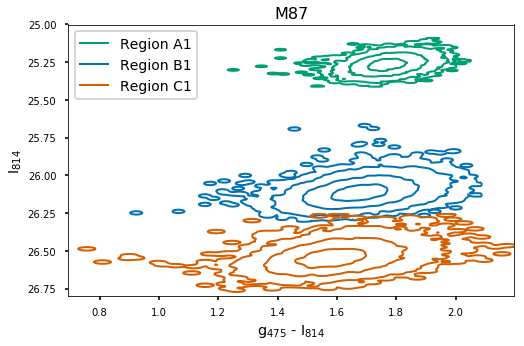

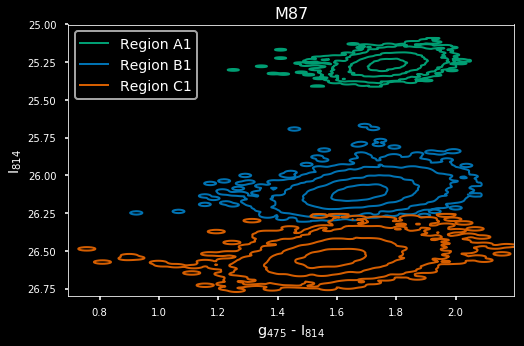

In [11]:
%%savefig_dark_light pcmds_M87v2.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M87v2_a1_m7"], ax=ax, label='Region A1 ', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["M87v2_b1_m7"], ax=ax, label='Region B1', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["M87v2_c1_m7"], ax=ax, label='Region C1', color=colors[2])
ppy.plotting.plot_isochrone(iso_models['M87v2'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([26.8, 25.0])
ax.set_title('M87')

Saving light figure as figures/pcmds_M87v1.pdf
Saving dark figure as figures_dark/pcmds_M87v1_dark.pdf


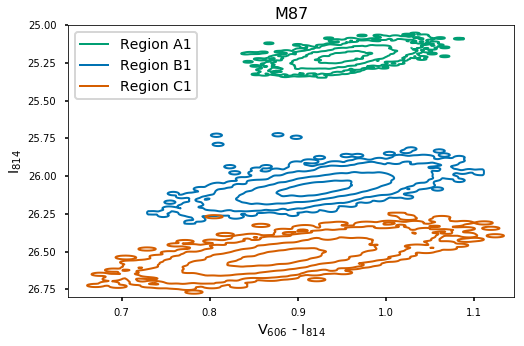

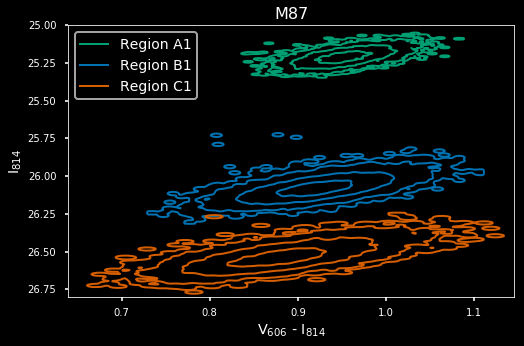

In [12]:
%%savefig_dark_light pcmds_M87v1.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M87_a1_m7"], ax=ax, label='Region A1', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["M87_b1_m7"], ax=ax, label='Region B1', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["M87_c1_m7"], ax=ax, label='Region C1', color=colors[2])
ppy.plotting.plot_isochrone(iso_models['M87'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([26.8, 25.0])
ax.set_title('M87')

Saving light figure as figures/pcmds_M49.pdf
Saving dark figure as figures_dark/pcmds_M49_dark.pdf


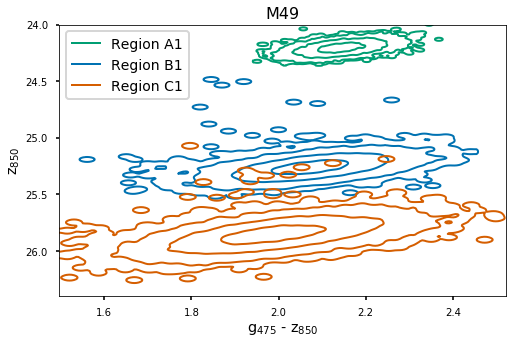

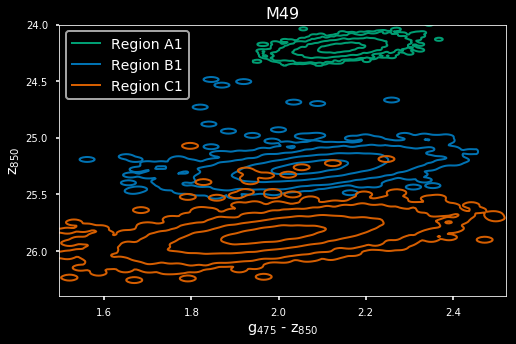

In [13]:
%%savefig_dark_light pcmds_M49.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M49_a1_m7"], ax=ax, label='Region A1', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["M49_b1_m7"], ax=ax, label='Region B1', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["M49_c1_m7"], ax=ax, label='Region C1', color=colors[2])
ppy.plotting.plot_isochrone(iso_models['M49'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([26.4, 24.])
ax.set_title('M49')

Saving light figure as figures/pcmds_NGC3377.pdf
Saving dark figure as figures_dark/pcmds_NGC3377_dark.pdf


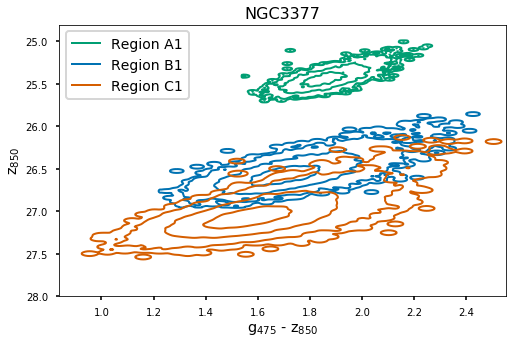

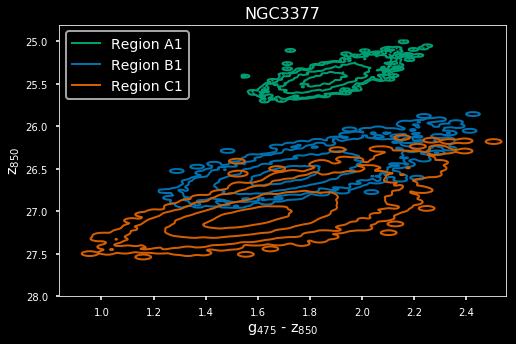

In [14]:
%%savefig_dark_light pcmds_NGC3377.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["NGC3377_a1_m7"], ax=ax, label='Region A1', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["NGC3377_b1_m7"], ax=ax, label='Region B1', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["NGC3377_c1_m7"], ax=ax, label='Region C1', color=colors[2])
ppy.plotting.plot_isochrone(iso_models['NGC3377'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([28.0, 24.8])
ax.set_title('NGC3377')

Saving light figure as figures/pcmds_NGC4993.pdf
Saving dark figure as figures_dark/pcmds_NGC4993_dark.pdf


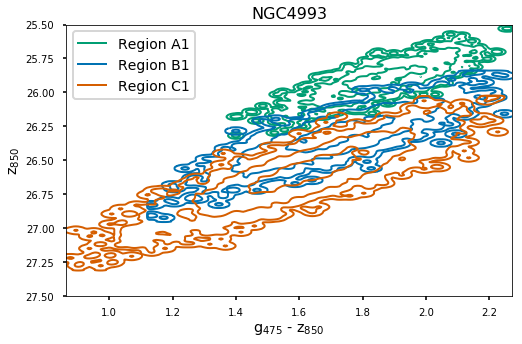

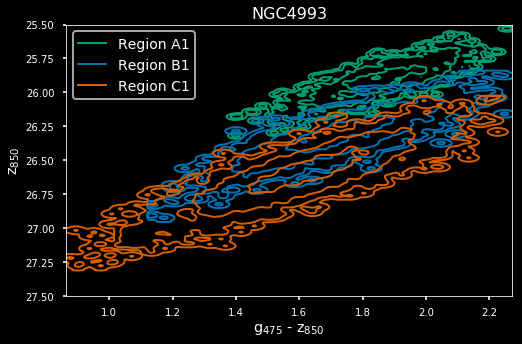

In [15]:
%%savefig_dark_light pcmds_NGC4993.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["NGC4993_a1_m7"], ax=ax, label='Region A1', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["NGC4993_b1_m7"], ax=ax, label='Region B1', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["NGC4993_c1_m7"], ax=ax, label='Region C1', color=colors[2])
ppy.plotting.plot_isochrone(iso_models['NGC4993'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([27.5, 25.5])
ax.set_title('NGC4993')

Saving light figure as figures/pcmds_M31.pdf
Saving dark figure as figures_dark/pcmds_M31_dark.pdf


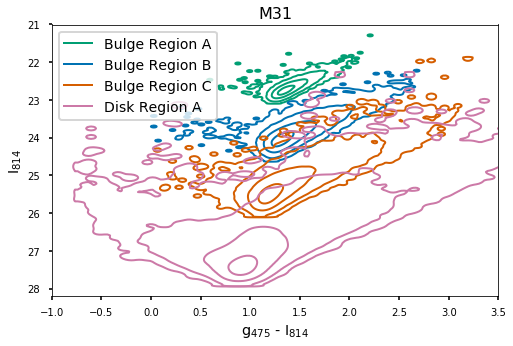

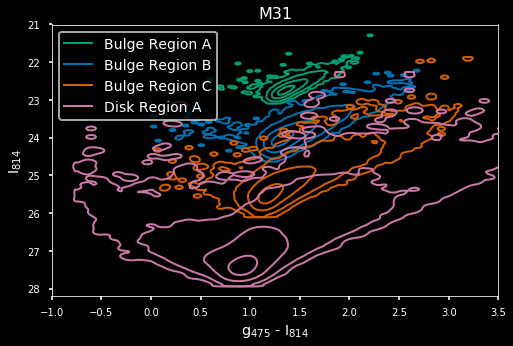

In [16]:
%%savefig_dark_light pcmds_M31.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M31_a_m7"], ax=ax, label='Bulge Region A', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["M31_c_m7"], ax=ax, label='Bulge Region B', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["M31_e_m7"], ax=ax, label='Bulge Region C', color=colors[2])
ppy.plotting.plot_pcmd_contours(data["M31d_a_m7"], ax=ax, label='Disk Region A', color=colors[3])
ppy.plotting.plot_isochrone(iso_models['M31'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([28.2, 21])
ax.set_xlim([-1., 3.5])
ax.set_title('M31')

Saving light figure as figures/pcmds_M51.pdf
Saving dark figure as figures_dark/pcmds_M51_dark.pdf


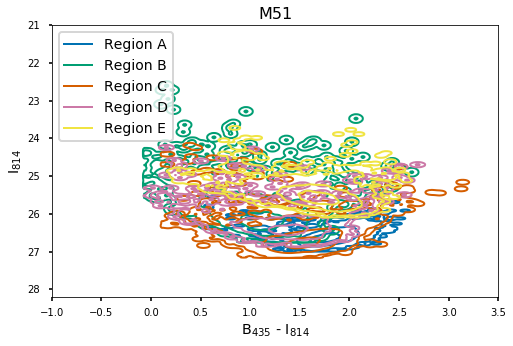

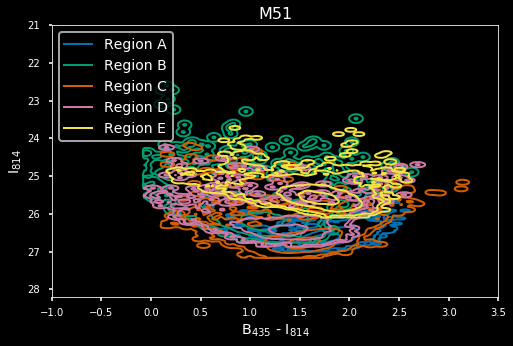

In [17]:
%%savefig_dark_light pcmds_M51.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M51_a_m7"], ax=ax, label='Region A', color=colors[0])
ppy.plotting.plot_pcmd_contours(data["M51_b_m7"], ax=ax, label='Region B', color=colors[1])
ppy.plotting.plot_pcmd_contours(data["M51_c_m7"], ax=ax, label='Region C', color=colors[2])
ppy.plotting.plot_pcmd_contours(data["M51_d_m7"], ax=ax, label='Region D', color=colors[3])
ppy.plotting.plot_pcmd_contours(data["M51_e_m7"], ax=ax, label='Region E', color=colors[4])
ppy.plotting.plot_isochrone(iso_models['M51'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([28.2, 21])
ax.set_xlim([-1., 3.5])
ax.set_title('M51')

## Figure 2a - Wide Region

Saving light figure as figures/pcmds_M87wide.pdf
Saving dark figure as figures_dark/pcmds_M87wide_dark.pdf


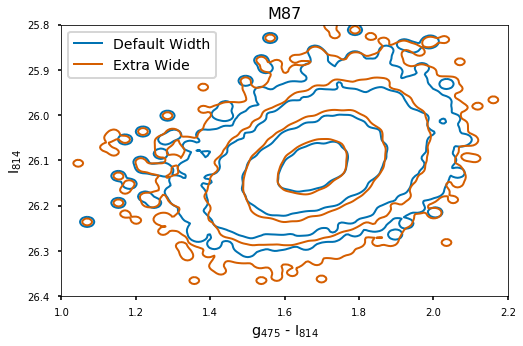

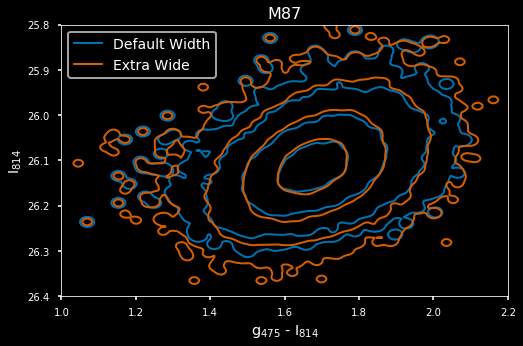

In [18]:
%%savefig_dark_light pcmds_M87wide.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M87v2_b1_m7"], ax=ax, label='Default Width', color=colors[0], span=[[1.0, 2.2],[25.8, 26.5]])
ppy.plotting.plot_pcmd_contours(data["M87v2_wide_m1"], ax=ax, label='Extra Wide', color=colors[2], span=[[1.0, 2.2],[25.8, 26.5]])
ppy.plotting.plot_isochrone(iso_models['M87v2'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([26.4, 25.8])
ax.set_title('M87')

## Figure 3 - PCMDs vs Quadrants

Saving light figure as figures/pcmds_M87wide.pdf
Saving dark figure as figures_dark/pcmds_M87wide_dark.pdf


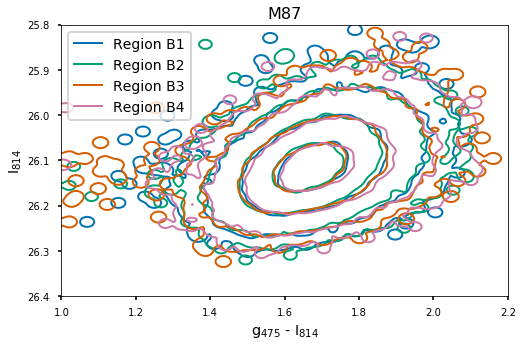

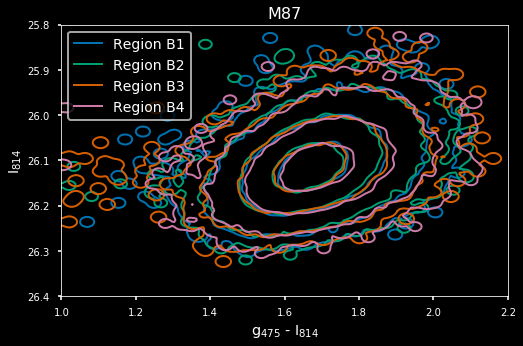

In [19]:
%%savefig_dark_light pcmds_M87wide.pdf
fig, ax = plt.subplots(figsize=(8,5))
ppy.plotting.plot_pcmd_contours(data["M87v2_b1_m7"], ax=ax, label='Region B1', color=colors[0], span=[[1.0, 2.2],[25.8, 26.5]])
ppy.plotting.plot_pcmd_contours(data["M87v2_b2_m7"], ax=ax, label='Region B2', color=colors[1], span=[[1.0, 2.2],[25.8, 26.5]])
ppy.plotting.plot_pcmd_contours(data["M87v2_b3_m7"], ax=ax, label='Region B3', color=colors[2], span=[[1.0, 2.2],[25.8, 26.5]])
ppy.plotting.plot_pcmd_contours(data["M87v2_b4_m7"], ax=ax, label='Region B4', color=colors[3], span=[[1.0, 2.2],[25.8, 26.5]])
ppy.plotting.plot_isochrone(iso_models['M87v2'], axes=ax, alpha=0.)
ax.legend(loc=2)
ax.set_ylim([26.4, 25.8])
ax.set_title('M87')